## Deep Information Retrieval and Neural Word Embeddings (Part 1)

**Task:** Classify text data into different emotions using word embedding and other deep information retrieval approaches.

**Github Repo:** [LINK](https://github.com/EvanYu800112/dm_2018Fall_Lab2)

**Dataset: ** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)
  
---

### Outline:
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Your show time
6. Other things you could try


---
### Task

** Classify text into one of 4 emotions **
  
![Imgur](https://i.imgur.com/k6tFirz.png)

---
### 1. Data Preparation

### 1-1 Load data

In [1]:
import pandas as pd

In [2]:
### training data - transform into dataframe
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset - combine 4 data into 1 big frame
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

---

In [5]:
# output --> (rows, columns - attributes)
print('shape of "training data":', train_df.shape)

train_df

shape of "training data": (3613, 4)


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [6]:
# shuffle dataset - change the order
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
train_df.head(10)

,id,text,emotion,intensity
2119,30115,"Good night, Twitter world! Wish you all good s...",joy,0.731
1674,20817,Why is it when you nap during the day you are ...,fear,0.375
2620,30616,@Blancalanka96 thought it'd be fun and it is n...,joy,0.340
79,10079,What the fuck am I supposed to do with no lunc...,anger,0.729
85,10085,@ManUtd you have had from me over the years is...,anger,0.873
2342,30338,Watch this amazing live.ly broadcast by @flydu...,joy,0.538
2022,30018,@TheMandyMoore You are beyond wonderful. Your...,joy,0.879
475,10475,"@len_snart gives a frustrated growl, before st...",anger,0.458
2655,30651,"@eachus At least he's willing to discuss, bett...",joy,0.320
1472,20615,India wants to #shake #hands with # pakistan ....,fear,0.458


---
![Imgur](https://i.imgur.com/lXBIX1Y.png)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

---

---
### 1-2 Save data

![Imgur](https://i.imgur.com/DMeWZY5.png)
The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

 e.g.
![Imgur](https://i.imgur.com/jXNE6e7.png)

In [8]:
## save to pickle file - in case of crash of the computer
# we use pickle because it has some advantages wrt .csv
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1-3 Exploratory data analysis (EDA)

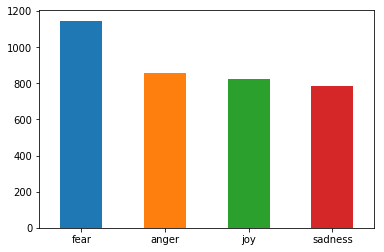

In [9]:
%matplotlib inline

train_df['emotion'].value_counts().plot(kind="bar", rot=0)

---
![Imgur](https://i.imgur.com/lXBIX1Y.png)
Is this considered an imbalanced dataset? Try to perform some more data exploration and statistical inference as done in lab session 1. 

---

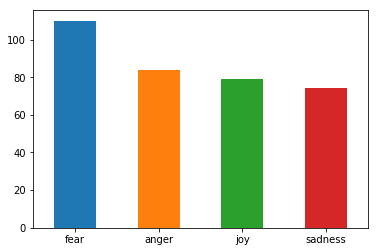

In [10]:
test_df['emotion'].value_counts().plot(kind="bar", rot=0)

---

### 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
# We need to use something to transform our data before we can introduce into the model. For that we would use Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])
#--------------------------------------------------------- AÑADIDO PARA EL TEST DE CLASE -----------------------------
#BOW_words = CountVectorizer(max_features=500, analyzer='word', stop_words='English',tokenizer=nltk.word_tokenize, ngram_range=(2,4), max_df=0.8)
#------------------------------------------------------------------------------------------------------------------------------

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# check the dimension
train_data_BOW_features.shape
# (there are 10115 words)

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

Basically, we could put this into classification model now.  

However, here are some problem....

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored

In [19]:
"😂" in feature_names
# we can check that the emoji is not included in our data

False

Thus, let us try other parameter setting...

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [4, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerful',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'crying',
 'customer']

In [23]:
"😂" in feature_names_500
# now the emoji is included in our data (we used the second 'advanced scissor' - by adjusting tokenizer and feature numbers)
# now we have the numerical vector that we can put in our model

True

---
### 3. Model
### Using Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# decision tree is supervised learning, it should be trained with labels.

In [25]:
# for a classification problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
print(X_train)
#------------------------------------------------------------------------------
#xxtrain = BOW_words.transform(train_df['text'])
#yytrain = train_df['emotion']
#------------------------------------------------------------------------------

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
#print('xxtrain.shape: ', xxtrain.shape)
#print('yytrain.shape: ', yytrain.shape)

  (0, 0)	2
  (0, 14)	1
  (0, 15)	1
  (0, 25)	1
  (0, 40)	1
  (0, 112)	1
  (0, 175)	2
  (0, 287)	1
  (0, 371)	1
  (0, 439)	1
  (0, 477)	1
  (0, 483)	1
  (0, 493)	1
  (1, 8)	1
  (1, 57)	1
  (1, 59)	1
  (1, 62)	1
  (1, 70)	1
  (1, 91)	1
  (1, 111)	1
  (1, 217)	1
  (1, 218)	1
  (1, 282)	1
  (1, 287)	1
  (1, 375)	1
  :	:
  (3611, 15)	1
  (3611, 31)	1
  (3611, 111)	1
  (3611, 185)	1
  (3611, 205)	1
  (3611, 217)	1
  (3611, 307)	1
  (3611, 427)	1
  (3611, 450)	1
  (3611, 460)	1
  (3611, 494)	1
  (3612, 18)	2
  (3612, 28)	1
  (3612, 31)	2
  (3612, 32)	1
  (3612, 55)	1
  (3612, 57)	1
  (3612, 84)	2
  (3612, 119)	1
  (3612, 147)	1
  (3612, 166)	1
  (3612, 277)	1
  (3612, 339)	1
  (3612, 435)	1
  (3612, 472)	1
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
# official document 2 to check the original values of the decision tree
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# we put the data into the decision tree
## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'sadness', 'joy', 'joy', 'fear', 'sadness',
       'anger', 'fear', 'fear'], dtype=object)

---
### 4. Results Evaluation

In [27]:
## How to evaluate the pred result? We need to check the quality of the prediction

# check statistical results

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.70      0.68      0.69        84
        fear       0.68      0.68      0.68       110
         joy       0.62      0.67      0.65        79
     sadness       0.63      0.59      0.61        74

   micro avg       0.66      0.66      0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 11  7  9]
 [11 75 14 10]
 [ 6 13 53  7]
 [ 7 12 11 44]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    classes.sort()
    tick_marks = np.arange(len(classes))    
    plt.figure(figsize=(4, 4),dpi=115)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


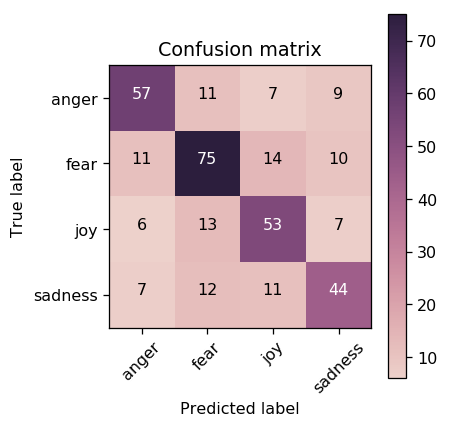

In [31]:
# plot your confusion matrix
# the correct result is in the main diagonal - anger - anger
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### 5. Your show time

#### Check what you are assigned to do here:  
* Google sheet  
https://docs.google.com/spreadsheets/d/1FMjT0LasiVIERRQH8Co8FhKnl2qwODRxOA87ivRSKMA/edit#gid=531101419

#### Share what you find in our in-class practice here:
* iLMS forum (title: Lab2 in-class discussion)  
http://lms.nthu.edu.tw/course.php?courseID=36071&f=forumlist

----

**To complete these tasks, you could refer to the official documents below**

- Feature engineering methods:
    * Bag of words  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
  
    * TF-IDF  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



- Models:
    * Decision tree  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
  
    * Naive bayes  
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

---
**During doing your experiments, please download this data at the same time:**  
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing



The data size is around 1.5GB before compress, but you **don't** **don't** **don't** need to decompress it.

---

### 6. Other things you can try
![Imgur](https://i.imgur.com/n7w94Dj.png)